In [2]:
import numpy as np
import matplotlib.pyplot as plt
from algoritmer import bfgs
from tensegrity import TensegrityStructure
import tests as TEST
import os
try:
    os.mkdir("../Bilder/")
except FileExistsError:
    print("Directory already created")


Directory already created


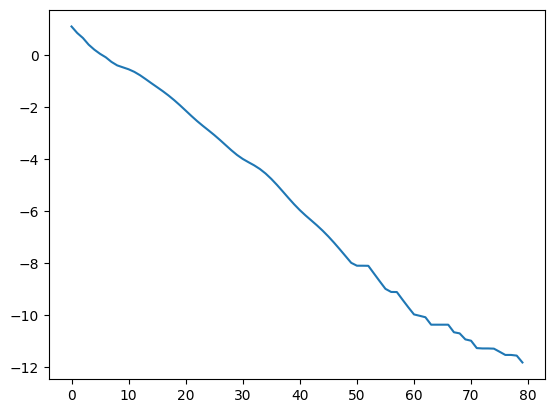

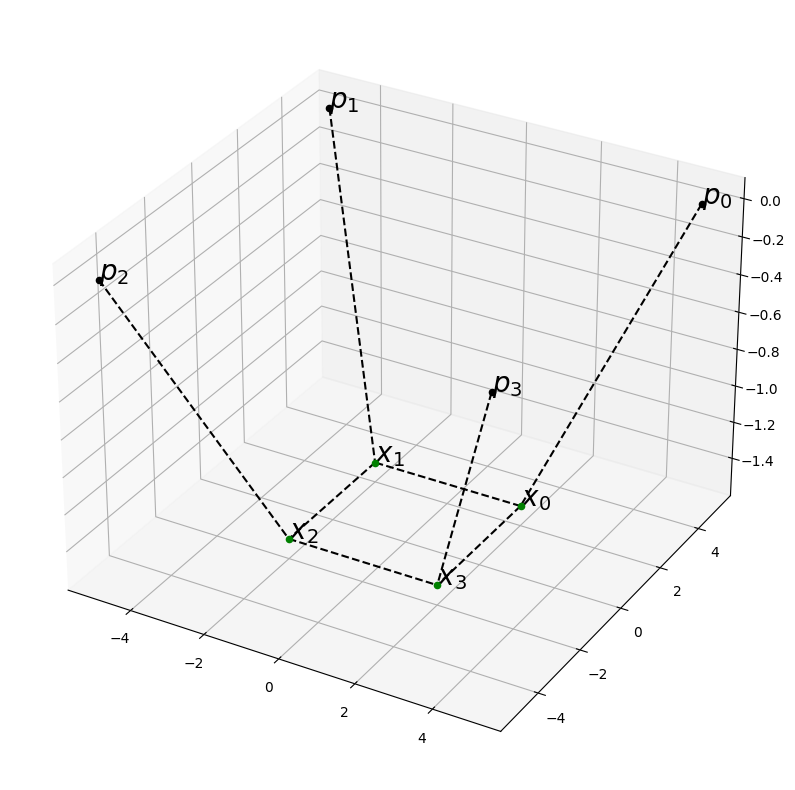

In [3]:
ts =  TEST.P25
x0 = np.arange(3 * len(ts.free_weights))
res, conv = bfgs(x0, ts.func, ts.grad, Niter=500, convergence_plot=True)
res = np.reshape(res,(-1, 3))

plt.plot(np.log10(conv))
fig, ax = ts.plot(res)
plt.savefig("../Bilder/P25.pdf") # Used in report.

np.save("tests/P25", res)


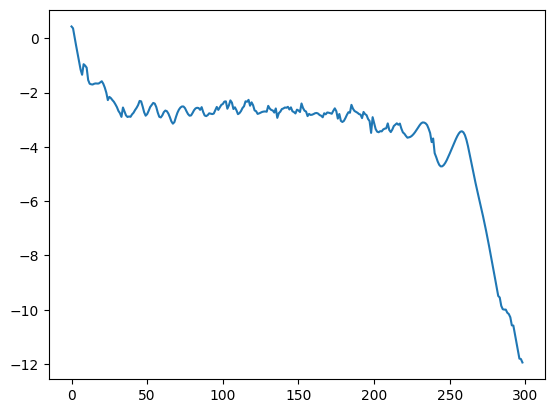

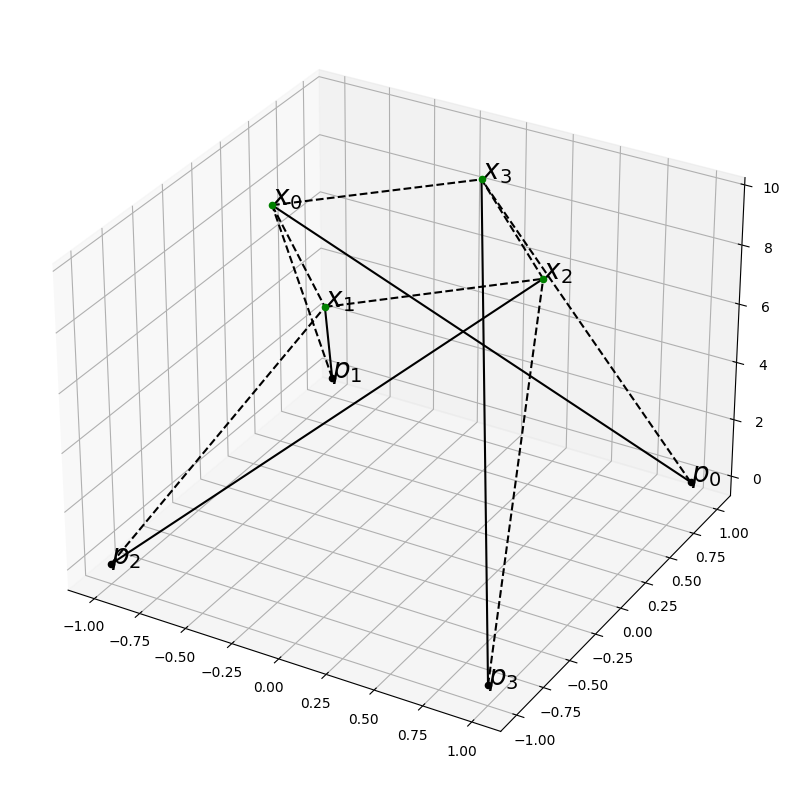

In [4]:
ts =  TEST.P69
x0 = np.arange(3 * len(ts.free_weights))
res, conv = bfgs(x0, ts.func, ts.grad, Niter=500, convergence_plot=True)
res = np.reshape(res,(-1, 3))
plt.plot(np.log10(conv))

plt.savefig("../Bilder/P69conv.pdf") # Used in report.

fig, ax = ts.plot(res)

plt.savefig("../Bilder/P69.pdf") # Used in report.

np.save("tests/P69", res)


In [5]:
ts = TEST.SANITYCHECK
x0 = np.arange(3 * len(ts.free_weights))
muMax = 1e10
for mu in np.linspace(1, muMax, 20):
    print(mu)
    x0 = bfgs(x0, ts.func(mu), ts.grad(mu), Niter=100)

res = bfgs(x0, ts.func(muMax), ts.grad(muMax), Niter=1000, plot_summary=True)


1.0
526315790.42105263
1052631579.8421053
1578947369.2631578
2105263158.6842105
2631578948.105263
3157894737.5263157
3684210526.9473686
4210526316.368421
4736842105.789474
5263157895.210526
5789473684.631579
6315789474.052631
6842105263.473684
7368421052.894737
7894736842.315789
8421052631.736842
8947368421.157894
9473684210.578947
10000000000.0
Maximum iteration obtained in BFGS method
Gradient at solution: 
 [[-3.71336447e-04 -8.46089569e-05  4.65114378e-04]
 [ 1.97913779e-04  7.08023505e-04  1.01251515e-04]
 [-1.34112899e-04 -6.70713822e-04  8.41289307e-04]
 [ 2.45358996e-04  3.75420576e-04 -1.61347714e-04]] 
 with norm: 
0.0015214747983026708

Solution: 
[[-2.34336472e+00  7.51918357e+00  6.20909798e-01]
 [-4.30209140e+00 -1.28124814e+01  6.32564858e-01]
 [ 5.64550712e+00 -1.63000166e+00  1.25255386e-02]
 [ 1.67644648e+00 -5.25559078e+00  1.45890032e+01]]
 with function value: 
1068124187413.3616



0.002136110522621656
5000000000.001


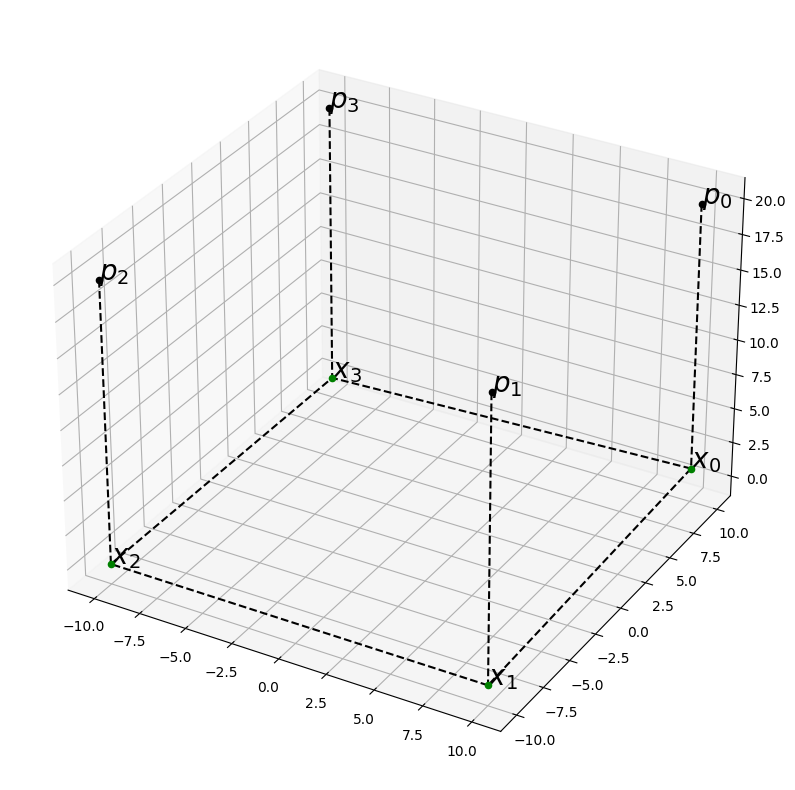

In [15]:
# ts.plot(res)

